# Pandas II

In [13]:
import pandas as pd

## Indexación y slicing

- `df[col]` -> Seleccionar columna por índice/etiqueta
- `df.col` -> Selecconar columna como atributo
- `df.loc[row]` -> Seleccionar fila por índice
- `df.loc[:, col]` -> Seleccionar valores de una columna por índices
- `df.loc[row, col]` -> Seleccionar elementos concretos por índices
- `df.iloc[row_int, col_int]` -> Seleccionar elemento concreto por coordenadas #No se usa mucho

In [14]:
import numpy as np

In [15]:
df = pd.DataFrame(np.arange(16).reshape(4, 4),
                         index=['f1', 'f2', 'f3', 'f4'],
                         columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15


In [16]:
df['c1'] #Así se puede llamar a los datos de una columna

f1     0
f2     4
f3     8
f4    12
Name: c1, dtype: int64

In [17]:
df.c1 #Así se puede llamar a los datos de una columna

f1     0
f2     4
f3     8
f4    12
Name: c1, dtype: int64

In [18]:
df.f1 #Así las filas no se pueden llamar

AttributeError: 'DataFrame' object has no attribute 'f1'

In [ ]:
df.loc['f1'] #Se llaman con el loc

In [ ]:
df.loc['f1', 'c2']

In [ ]:
df.iloc[0, 1]

- También podemos seleccionar varias columnas a la vez

In [ ]:
df[['c1', 'c3']]

In [19]:
df.loc[['f2', 'f4'], ['c2', 'c3']] #o varias filas a la vez

,c2,c3
f2,5,6
f4,13,14


In [20]:
df.iloc[[2, 3], [0, 1]]

,c1,c2
f3,8,9
f4,12,13


## Reindexing

- No se trata de cambiar el índice sino de reordenarlo, eliminar o añadir nuevas etiquetas.

In [21]:
df #Para determinados valores solo

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15


In [22]:
df.reindex(list(df.index) + ['f8']) #Ojo siempre revisar si lo que pasamos es una lista df.index

,c1,c2,c3,c4
f1,0.0,1.0,2.0,3.0
f2,4.0,5.0,6.0,7.0
f3,8.0,9.0,10.0,11.0
f4,12.0,13.0,14.0,15.0
f8,NaN,NaN,NaN,NaN


In [23]:
df.reindex(list(df.index) + ['f8'], fill_value='NaN')

,c1,c2,c3,c4
f1,0,1,2,3
f2,4,5,6,7
f3,8,9,10,11
f4,12,13,14,15
f8,NaN,NaN,NaN,NaN


- También podemos usarlo para eliminar columnas

In [24]:
df.reindex(columns=['c1', 'c2', 'c5'])

,c1,c2,c5
f1,0,1,NaN
f2,4,5,NaN
f3,8,9,NaN
f4,12,13,NaN


## Índices con duplicados

- Los índices pueden estar duplicados

In [25]:
serie = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
serie

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [26]:
serie.index.is_unique # ¿El índice tiene datos únicos?

False

In [27]:
serie['a'] #Me devuelve dos objetos, devuelve una serie

a    0
a    1
dtype: int64

In [28]:
serie['c'] #Devuelve un valor

4

In [29]:
type(serie['c'])

numpy.int64

## Operaciones aritméticas con pandas

- Las operaciones se vectorizan alineandose según el índice
- Si hay índices que no coinciden se rellenan con NaN

In [30]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [31]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [32]:
s1 + s2 #Los suman según el índice! En indices que no puede hacer la operación, deja NaN

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

- Existen funciones para poder especificar los valores de relleno cuando faltan índices

In [33]:
s1.add(s2, fill_value=0) #Así rellena los valores donde no hay índice con cero y después ya hace la suma bien

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

- Lo mismo para dataframes

In [34]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [35]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                   columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [36]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [37]:
df1 = pd.DataFrame({'A': [1, 2]})
df1

,A
0,1
1,2


In [38]:
df2 = pd.DataFrame({'B': [3, 4]})
df2

,B
0,3
1,4


In [39]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


## Visualización básica

- Las estructuras Series y Dataframe traen métodos básicos para visualizar los datos
- Estos métodos utilizan por debajo la librería `matplotlib`, librería estándar para visualización de datos en Python

In [40]:
data = {
    'population': np.random.randint(100, 300, 10),
    'PIB': np.random.randint(10000, 30000, 10),
}
df = pd.DataFrame(data)
df

,population,PIB
0,137,19514
1,115,27999
2,103,14855
3,218,15460
4,280,11111
5,252,25436
6,222,15958
7,262,12432
8,245,11989
9,136,27333


In [41]:
df.plot()

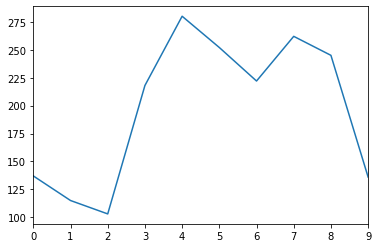

In [42]:
df.population.plot()

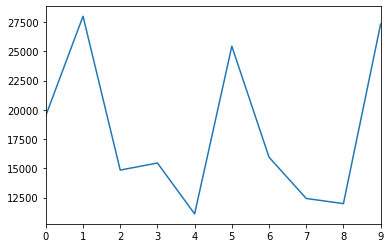

In [43]:
df.PIB.plot()

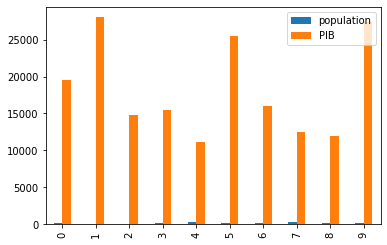

In [44]:
df.plot.bar()

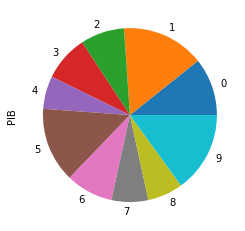

In [45]:
df.PIB.plot.pie()

In [46]:
df = pd.DataFrame(np.random.normal(size=1000), columns=['Normal'])

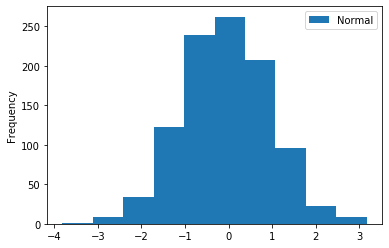

In [47]:
df.plot.hist()

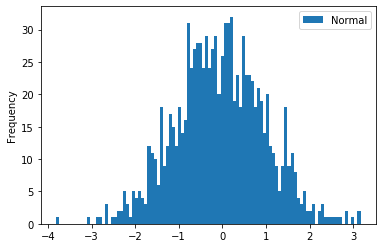

In [48]:
df.plot.hist(bins=100)

In [49]:
df['chi2'] = np.random.chisquare(10, size=1000)

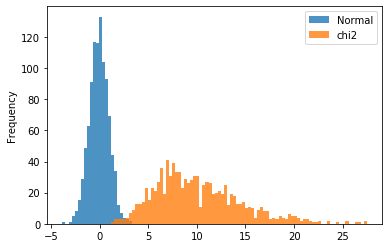

In [50]:
df.plot.hist(bins=100, alpha=0.8)

- Estos métodos pasan directamente los kwargs a las funciones de matplotlib
- Por lo que podemos buscar información sobre las opciones de estos métodos directamente en matplotlib.

- Aunque estos métodos proporcionan una forma rápida y cómoda de visualizar los datos, normalmente presentan una funcionalidad limitada respecto a la librería estándar `matplotlib`

## Funciones

- `count` -> Cuenta valores que no sean Nan
- `describe` -> Resumen estadístico de los datos
- `min`/`max` -> Valor mínimo/máximo
- `argmin`/`argmax` -> Devuelve la posición del valor mínimo/máximo (sólo para Series)
- `idxmin`/`idxmax` -> Devuelve las etiquetas del valor mínimo/máximo
- `quantile` -> Calcula los cuantiles
- `sum` -> Suma los valores
- `mean` -> Media
- `median` -> Mediana
- `mad` -> Media de la desviación absoluta respecto de la media
- `prod` -> Producto de todos los valorees
- `var` -> Varianza
- `std` -> Desviación estándar
- `skew` -> Asimetría (3º momento de la distribución)
- `kurt` -> Curtosis (4º momento de la distribución)
- `cumsum` -> Suma acumulativa
- `cumprod` -> Producto acumulativo
- `diff` -> Diferencia aritmética entre valores consecutivos
- `pct_change` -> Calcula la variación en porcentaje entre valores consecutivos


In [51]:
df = pd.read_csv('data/googl.us.csv')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [52]:
df.shape

(3333, 7)

In [53]:
df.Date.head() #Lo primero es ver qué tipos de datos hay y en qué formato son, en este caso, objeto

0    2004-08-19
1    2004-08-20
2    2004-08-23
3    2004-08-24
4    2004-08-25
Name: Date, dtype: object

In [54]:
df = pd.read_csv('data/googl.us.csv', index_col='Date', parse_dates=['Date']) #Para arreglar lo anterior y poner en formato fecha el índice
df.drop('OpenInt', axis=1, inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.000,52.03,47.980,50.170,44703800
2004-08-20,50.505,54.54,50.250,54.155,22857200
2004-08-23,55.375,56.74,54.525,54.700,18274400
2004-08-24,55.620,55.80,51.785,52.435,15262600
2004-08-25,52.480,54.00,51.940,53.000,9197800
...,...,...,...,...,...
2017-11-06,1049.100,1052.59,1042.000,1042.680,913954
2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832
2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469


In [55]:
df.index[:5] #Ojo, el indice es de formato Datetime, y así podemos hacer más cosas con ellos

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [56]:
df.count() #Para ver si hay NaN, cuenta todos los datos que no tienen NaN

Open      3333
High      3333
Low       3333
Close     3333
Volume    3333
dtype: int64

In [57]:
df.describe()

,Open,High,Low,Close,Volume
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,389.993375,393.377354,386.213266,389.855821,7.951734e+06
std,235.104757,236.348229,233.616339,235.102374,8.327410e+06
min,49.595000,50.870000,47.980000,50.005000,0.000000e+00
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07


In [58]:
df.max()

Open          1050.05
High          1063.62
Low           1047.05
Close         1058.29
Volume    82233400.00
dtype: float64

In [59]:
df.max(axis=1)

Date
2004-08-19    44703800.0
2004-08-20    22857200.0
2004-08-23    18274400.0
2004-08-24    15262600.0
2004-08-25     9197800.0
                 ...    
2017-11-06      913954.0
2017-11-07     1303832.0
2017-11-08     1214469.0
2017-11-09     1793994.0
2017-11-10      970498.0
Length: 3333, dtype: float64

In [60]:
df.idxmax() #Preguntando segun el indice máximo

Open     2017-11-08
High     2017-10-27
Low      2017-11-08
Close    2017-11-08
Volume   2006-01-20
dtype: datetime64[ns]

In [61]:
df.quantile(q=0.23)

Open      2.201800e+02
High      2.237680e+02
Low       2.171888e+02
Close     2.199200e+02
Volume    2.356028e+06
Name: 0.23, dtype: float64

In [62]:
df.mean()

Open      3.899934e+02
High      3.933774e+02
Low       3.862133e+02
Close     3.898558e+02
Volume    7.951734e+06
dtype: float64

In [63]:
df.median()

Open          295.98
High          298.19
Low           293.35
Close         295.61
Volume    5201600.00
dtype: float64

In [64]:
df.std()

Open      2.351048e+02
High      2.363482e+02
Low       2.336163e+02
Close     2.351024e+02
Volume    8.327410e+06
dtype: float64

In [65]:
df['Volume'].cumsum() #Por defecto te lo calcula por columnas ya que estás recogiendo una serie

Date
2004-08-19       44703800
2004-08-20       67561000
2004-08-23       85835400
2004-08-24      101098000
2004-08-25      110295800
                 ...     
2017-11-06    26497846139
2017-11-07    26499149971
2017-11-08    26500364440
2017-11-09    26502158434
2017-11-10    26503128932
Name: Volume, Length: 3333, dtype: int64

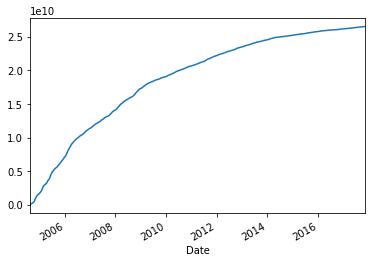

In [66]:
df['Volume'].cumsum().plot()

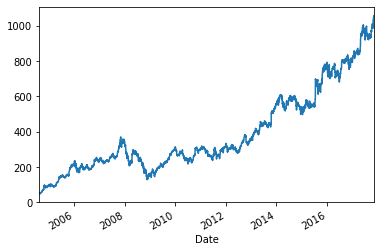

In [67]:
df['Close'].plot()

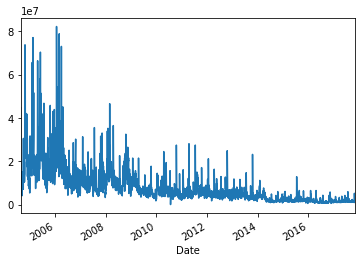

In [68]:
df ['Volume'].plot()

In [69]:
df.diff() #Calcula la diferencia primero con el segundo y sucesivamente, el primero como no tiene nada con que restarlo es NaN

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN
2004-08-20,0.505,2.51,2.270,3.985,-21846600.0
2004-08-23,4.870,2.20,4.275,0.545,-4582800.0
2004-08-24,0.245,-0.94,-2.740,-2.265,-3011800.0
2004-08-25,-3.140,-1.80,0.155,0.565,-6064800.0
...,...,...,...,...,...
2017-11-06,6.350,1.93,4.350,-7.310,-474507.0
2017-11-07,0.550,0.82,1.000,9.710,389878.0
2017-11-08,0.400,9.28,4.050,5.900,-89363.0


In [70]:
df_pct = df.pct_change() #Calcula los cambios en porcentajes

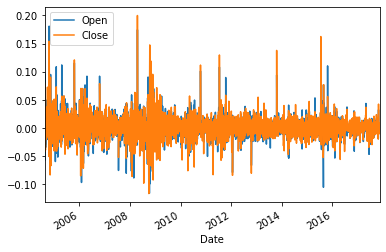

In [71]:
df_pct[['Open', 'Close']].plot()

- La mayoría de estas funciones poseen un parámetro `axis` que nos indica si queremos agregar:
    - `axis=0` -> por filas  o
    - `axis=1` -> por columnas

In [72]:
df.drop('Volume', axis=1, inplace=True)

In [73]:
df.mean(axis=1)

Date
2004-08-19      50.0450
2004-08-20      52.3625
2004-08-23      55.3350
2004-08-24      53.9100
2004-08-25      52.8550
                ...    
2017-11-06    1046.5925
2017-11-07    1049.6125
2017-11-08    1054.5200
2017-11-09    1045.6125
2017-11-10    1043.9675
Length: 3333, dtype: float64

- No olvidemos que siempre podemos consultar la ayuda de cada una de estas funciones.
- Esto es especialmente útil para saber los parámetros que les podemos pasar.

- Hay infinidad de métodos, que se van aprendiendo con el uso

In [74]:
from utils import midir
midir(pd.DataFrame())

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_accessors',
 '_add_numeric_operations',
 '_add_series_only_operations',
 '_add_series_or_dataframe_operations',
 '_agg_by_level',
 '_agg_examples_doc',
 '_agg_summary_and_see_also_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_align_frame',
 '_align_series',
 '_box_col_values',
 '_box_item_values',
 '_builtin_table',
 '_check_inplace_setting',
 '_check_is_chained_assignment_possible',
 '_check_label_or_level_ambiguity',
 '_check_percentile',
 '_check_setitem_copy',
 '_clear_item_cache',
 '_clip_with_one_bound',
 '_clip_with_scalar',
 '_combine_const',
 '_combine_frame',
 '_combine_match_columns',
 '_combine_match_index',
 '_consolidate',
 '_consolidate_inplace',
 '_construct_axes_dict',
 '_construct_axes_dict_from',
 '_construct_axes_from_arguments',
 '_constructor',
 '_constructor_expanddim',
 '_constructor_sliced',
 '_convert',
 '_count_level',
 '_c

## Mappings

- Podemos aplicar una función arbitraria a un pandas dataframe con los métodos:
    - `applymap()` -> Aplica elemento a elementos
    - `apply()` -> Aplica sobre filas o columnas
- En el caso de `apply()`, por defecto, el mapping se aplica a las filas, pero podemos cambiarlo con el parámetro `axis`

In [75]:
df.head()

,Open,High,Low,Close
Date,,,,
2004-08-19,50.000,52.03,47.980,50.170
2004-08-20,50.505,54.54,50.250,54.155
2004-08-23,55.375,56.74,54.525,54.700
2004-08-24,55.620,55.80,51.785,52.435
2004-08-25,52.480,54.00,51.940,53.000


In [76]:
df.applymap(np.floor) #Aplica una función a cada elemento individualmente

,Open,High,Low,Close
Date,,,,
2004-08-19,50.0,52.0,47.0,50.0
2004-08-20,50.0,54.0,50.0,54.0
2004-08-23,55.0,56.0,54.0,54.0
2004-08-24,55.0,55.0,51.0,52.0
2004-08-25,52.0,54.0,51.0,53.0
...,...,...,...,...
2017-11-06,1049.0,1052.0,1042.0,1042.0
2017-11-07,1049.0,1053.0,1043.0,1052.0
2017-11-08,1050.0,1062.0,1047.0,1058.0


In [77]:
df.applymap(lambda x: np.round(x) - np.floor(x)) #Aplica una función en lambda

,Open,High,Low,Close
Date,,,,
2004-08-19,0.0,0.0,1.0,0.0
2004-08-20,1.0,1.0,0.0,0.0
2004-08-23,0.0,1.0,1.0,1.0
2004-08-24,1.0,1.0,1.0,0.0
2004-08-25,0.0,0.0,1.0,0.0
...,...,...,...,...
2017-11-06,0.0,1.0,0.0,1.0
2017-11-07,1.0,0.0,0.0,0.0
2017-11-08,0.0,1.0,0.0,0.0


In [78]:
def fun(serie):
    return serie.max() - serie.min()

In [79]:
df.apply(fun) #No le pasa elemento a elemento, le pasa todas las columnas

Open     1000.455
High     1012.750
Low       999.070
Close    1008.285
dtype: float64

In [80]:
df.apply(fun, axis=1) #Lo mismo pero por filas, no por columnas

Date
2004-08-19     4.050
2004-08-20     4.290
2004-08-23     2.215
2004-08-24     4.015
2004-08-25     2.060
               ...  
2017-11-06    10.590
2017-11-07    10.410
2017-11-08    15.640
2017-11-09    15.030
2017-11-10     5.410
Length: 3333, dtype: float64

In [81]:
df.apply(lambda x: x/x.Close, axis=1) #Se normalizan los precios al Close así

,Open,High,Low,Close
Date,,,,
2004-08-19,0.996612,1.037074,0.956348,1.0
2004-08-20,0.932601,1.007109,0.927892,1.0
2004-08-23,1.012340,1.037294,0.996801,1.0
2004-08-24,1.060742,1.064175,0.987604,1.0
2004-08-25,0.990189,1.018868,0.980000,1.0
...,...,...,...,...
2017-11-06,1.006157,1.009504,0.999348,1.0
2017-11-07,0.997396,1.000969,0.991077,1.0
2017-11-08,0.992214,1.004158,0.989379,1.0


In [82]:
df.apply(lambda x: pd.Series(x/x.Close), axis=1)

,Open,High,Low,Close
Date,,,,
2004-08-19,0.996612,1.037074,0.956348,1.0
2004-08-20,0.932601,1.007109,0.927892,1.0
2004-08-23,1.012340,1.037294,0.996801,1.0
2004-08-24,1.060742,1.064175,0.987604,1.0
2004-08-25,0.990189,1.018868,0.980000,1.0
...,...,...,...,...
2017-11-06,1.006157,1.009504,0.999348,1.0
2017-11-07,0.997396,1.000969,0.991077,1.0
2017-11-08,0.992214,1.004158,0.989379,1.0


- Si estamos trabajando con una serie, debemos usar el método `map()`

In [83]:
df['Open'].applymap()

AttributeError: 'Series' object has no attribute 'applymap'

In [ ]:
df['Open'].map(np.floor)

## Sorting

- Podemos ordenar según el índice

In [ ]:
df.sort_index(ascending=False) #Ordena según el índice

- También podemos ordenar según los valores

In [ ]:
df_s = df.sort_values(by='Close') #Ordena según valores de una determinda columna
df_s